<a href="https://colab.research.google.com/github/rlaxodns/google-/blob/main/keras15_validation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing

In [ ]:
# 데이터 구성
dataset = fetch_california_housing()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x.shape, y.shape) #(20640, 8) (20640,)

(20640, 8) (20640,)


In [ ]:
# 모델구성
model = Sequential()
model.add(Dense(30, input_dim = 8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
# 컴파일 및 훈련
model.compile(loss = 'mse', optimizer = 'adam')
hist = model.fit(x_train, y_train, epochs = 200, batch_size = 3,
          validation_split = 0.2 , verbose = 2)

Epoch 1/200
3853/3853 - 7s - loss: 1.3348 - val_loss: 1.3603 - 7s/epoch - 2ms/step
Epoch 2/200
3853/3853 - 8s - loss: 1.3350 - val_loss: 1.3604 - 8s/epoch - 2ms/step
Epoch 3/200
3853/3853 - 8s - loss: 1.3348 - val_loss: 1.3608 - 8s/epoch - 2ms/step
Epoch 4/200
3853/3853 - 6s - loss: 1.3350 - val_loss: 1.3609 - 6s/epoch - 2ms/step
Epoch 5/200
3853/3853 - 9s - loss: 1.3352 - val_loss: 1.3605 - 9s/epoch - 2ms/step
Epoch 6/200
3853/3853 - 6s - loss: 1.3350 - val_loss: 1.3604 - 6s/epoch - 2ms/step
Epoch 7/200
3853/3853 - 7s - loss: 1.3350 - val_loss: 1.3607 - 7s/epoch - 2ms/step
Epoch 8/200
3853/3853 - 6s - loss: 1.3351 - val_loss: 1.3603 - 6s/epoch - 2ms/step
Epoch 9/200
3853/3853 - 8s - loss: 1.3351 - val_loss: 1.3604 - 8s/epoch - 2ms/step
Epoch 10/200
3853/3853 - 6s - loss: 1.3349 - val_loss: 1.3607 - 6s/epoch - 2ms/step
Epoch 11/200
3853/3853 - 7s - loss: 1.3351 - val_loss: 1.3603 - 7s/epoch - 2ms/step
Epoch 12/200
3853/3853 - 6s - loss: 1.3349 - val_loss: 1.3606 - 6s/epoch - 2ms/step
E

In [ ]:
# 평가 및 예측
loss = model.evaluate(x_test, y_test)
result = model.predict([x])

# r2 스코어 계산
y_pre = model.predict([x_test])
r2 = r2_score(y_test, y_pre)

print(loss)
print(result)
print(r2)

print("_____________________________________")
print(hist.history)

194/194 [==============================] - 0s 1ms/step
1.3126494884490967
[[2.0774252]
 [2.0774252]
 [2.0774252]
 ...
 [2.0774252]
 [2.0774252]
 [2.0774252]]
-8.331243570003366e-05
_____________________________________
{'loss': [1.3347994089126587, 1.335025429725647, 1.3348212242126465, 1.3349967002868652, 1.3351942300796509, 1.3349970579147339, 1.3350427150726318, 1.3351408243179321, 1.3350986242294312, 1.334944725036621, 1.3351091146469116, 1.3348528146743774, 1.3350931406021118, 1.3349437713623047, 1.3350296020507812, 1.3351192474365234, 1.3349236249923706, 1.334636926651001, 1.335059642791748, 1.3350600004196167, 1.335021734237671, 1.3350791931152344, 1.3350162506103516, 1.334959864616394, 1.3348428010940552, 1.3349076509475708, 1.3350327014923096, 1.3349225521087646, 1.334946870803833, 1.3350492715835571, 1.3350026607513428, 1.3346898555755615, 1.3350188732147217, 1.334905743598938, 1.334959626197815, 1.334870457649231, 1.334912896156311, 1.3347241878509521, 1.3349601030349731, 1.

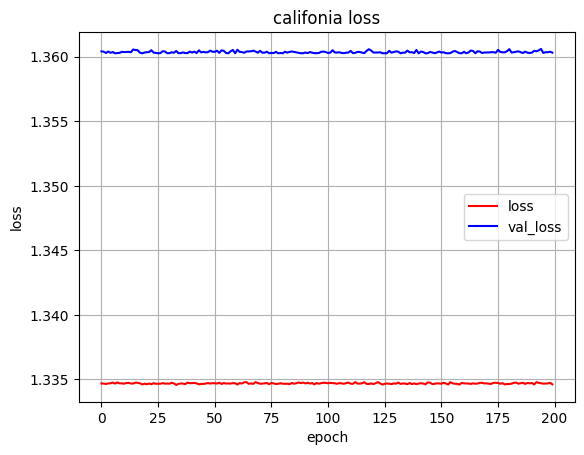

In [ ]:
# 시각화
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'], c = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], c = 'blue', label = 'val_loss')
plt.legend()
plt.title('califonia loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()